In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Studi Independent/NLP/'

/content/drive/MyDrive/Studi Independent/NLP


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

#Data Cleaning

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
import re, string, unicodedata
from string import punctuation

In [ ]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
def hapus_kurung(text):
  return re.sub('\[[^]]*\]', '', text)
def hapus_url(text):
  return re.sub(r'https\S+', '', text)
def hapus_spesial_character(text, remove_digits=True):
  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
  final_text = []
  for i in text.split():
    if i.strip().lower() not in stop and i.strip().lower().isalpha():
      final_text.append(i.strip().lower())
  return " ".join(final_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
  text = hapus_kurung(text)
  text = hapus_url(text)
  text = hapus_spesial_character(text, True)
  text = remove_stopwords(text)
  return text

df['review'] = df['review'].apply(clean_text)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


#Membuat Wordcloud

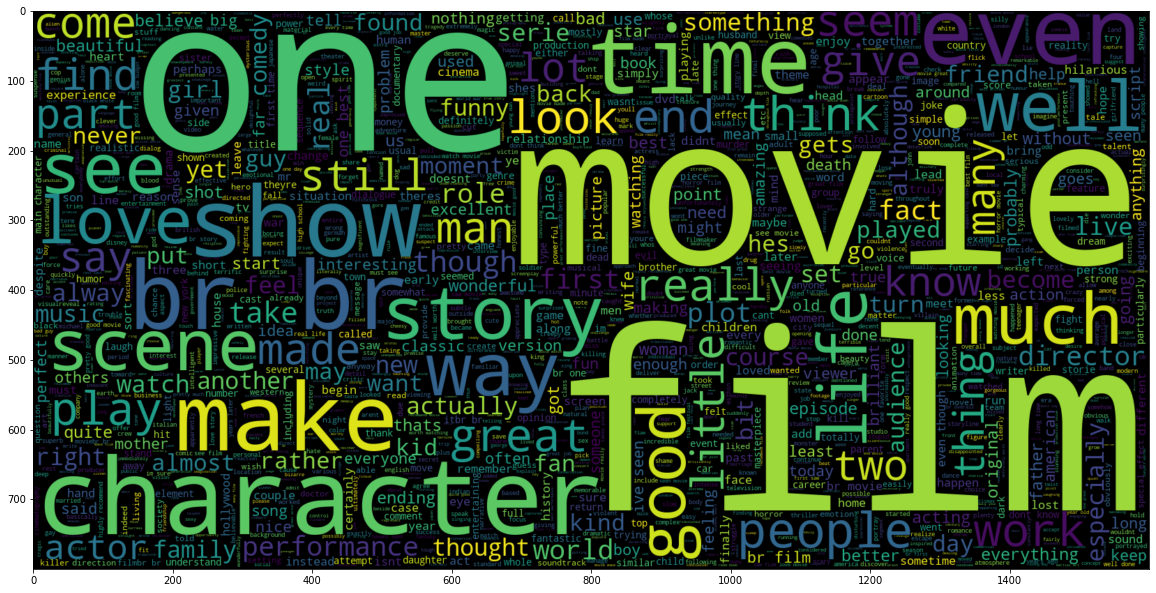

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height=800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
text = df['review'].values.tolist()
label = df['sentiment'].values

# Vektorisasi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer().fit(text)
tfidf_text=tfidf_vectorizer.transform(text)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state =123)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
model = SVC().fit(X_train, y_train)

In [ ]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7248
           1       0.91      0.89      0.90      7752

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

